Data  analysis and visualization of the evolution of satellite conjunctions over a period of time

Importing libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df=pd.read_csv('/kaggle/input/satellite/sort-minRange (1).csv')

## Data Exploration

In [3]:
print('Shape of train data : ',df.shape)

Shape of train data :  (67527, 11)


In [4]:
df.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,54194,STARLINK-5271 [+],4.440,57327,OBJECT BB [-],4.017,2023-11-16 10:19:56.153,0.015,14.689,0.074910,0.008
1,53980,STARLINK-5133 [+],6.673,39690,COSMOS 921 DEB [-],6.440,2023-11-18 06:43:24.056,0.024,8.707,0.054480,0.007
2,52380,STARLINK-3793 [+],1.755,43801,OBJECT AV [-],1.225,2023-11-13 16:11:23.309,0.026,5.733,0.051040,0.007
3,56154,OBJECT B [+],0.484,56155,OBJECT C [+],0.484,2023-11-12 23:53:39.065,0.029,0.001,0.005313,0.007
4,41850,CELTEE 1 [+],2.070,55991,STARLINK-5948 [+],1.485,2023-11-13 22:37:57.150,0.032,13.486,0.021000,0.014


In [5]:
df.columns

Index(['NORAD_CAT_ID_1', 'OBJECT_NAME_1', 'DSE_1', 'NORAD_CAT_ID_2',
       'OBJECT_NAME_2', 'DSE_2', 'TCA', 'TCA_RANGE', 'TCA_RELATIVE_SPEED',
       'MAX_PROB', 'DILUTION'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67527 entries, 0 to 67526
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NORAD_CAT_ID_1      67527 non-null  int64  
 1   OBJECT_NAME_1       67527 non-null  object 
 2   DSE_1               67527 non-null  float64
 3   NORAD_CAT_ID_2      67527 non-null  int64  
 4   OBJECT_NAME_2       67527 non-null  object 
 5   DSE_2               67527 non-null  float64
 6   TCA                 67527 non-null  object 
 7   TCA_RANGE           67527 non-null  float64
 8   TCA_RELATIVE_SPEED  67527 non-null  float64
 9   MAX_PROB            67527 non-null  float64
 10  DILUTION            67527 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.7+ MB


Checking for null values

In [7]:
df.isnull().sum()

NORAD_CAT_ID_1        0
OBJECT_NAME_1         0
DSE_1                 0
NORAD_CAT_ID_2        0
OBJECT_NAME_2         0
DSE_2                 0
TCA                   0
TCA_RANGE             0
TCA_RELATIVE_SPEED    0
MAX_PROB              0
DILUTION              0
dtype: int64

No null values in train dataset

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NORAD_CAT_ID_1,67527.0,48439.866661,7096.106154,9.000000e+02,4.388100e+04,48860.000000,53876.000000,58255.00000
DSE_1,67527.0,4.036083,2.050450,1.070000e-01,2.292000e+00,4.042000,5.783000,26.80900
NORAD_CAT_ID_2,67527.0,43542.512151,23210.799216,1.100000e+01,3.187800e+04,46484.000000,56197.000000,270286.00000
DSE_2,67527.0,4.447418,2.718874,1.210000e-01,2.481000e+00,4.305000,6.080500,36.44300
TCA_RANGE,67527.0,3.322413,1.180600,1.500000e-02,2.487000e+00,3.522000,4.321000,5.00000
TCA_RELATIVE_SPEED,67527.0,11.357774,3.799778,0.000000e+00,8.961000e+00,12.884000,14.405000,17.04700
MAX_PROB,67527.0,0.000015,0.000458,1.576000e-08,2.425000e-07,0.000001,0.000002,0.07491
DILUTION,67527.0,1.394541,0.709551,7.000000e-03,8.850000e-01,1.262000,1.851000,3.52900


### Filter Data for a Specific Satellite

In [9]:
satellite_id = 900
satellite_df = df[(df['NORAD_CAT_ID_1'] == satellite_id) | (df['NORAD_CAT_ID_2'] == satellite_id)]

In [10]:
satellite_df.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
1159,900,CALSPHERE 1 [+],3.185,31963,FENGYUN 1C DEB [-],10.820,2023-11-15 16:41:55.533,0.622,7.262,3.999000e-06,0.166
11657,900,CALSPHERE 1 [+],0.702,29196,COSMOS 860 COOLANT [-],4.345,2023-11-13 05:06:37.734,2.074,9.536,3.225000e-07,0.618
13403,900,CALSPHERE 1 [+],6.170,48518,FENGYUN 1C DEB [-],23.018,2023-11-18 16:20:57.907,2.220,14.138,1.489000e-07,1.250
17216,900,CALSPHERE 1 [+],6.902,36519,COSMOS 2463 [+],7.548,2023-11-19 09:53:50.296,2.513,14.644,9.659000e-08,1.700
19750,900,CALSPHERE 1 [+],1.936,13260,SL-8 R/B [-],2.142,2023-11-14 10:43:22.806,2.698,14.004,9.235000e-07,1.435


In [11]:
df['TCA'] = pd.to_datetime(df['TCA'])
df['Day'] = df['TCA'].dt.date
daily_conjunctions = df.groupby('Day').size().reset_index(name='Conjunctions')

In [12]:
daily_conjunctions

,Day,Conjunctions
0,2023-11-12,3303
1,2023-11-13,9563
2,2023-11-14,9518
3,2023-11-15,9702
4,2023-11-16,9724
5,2023-11-17,9723
6,2023-11-18,9554
7,2023-11-19,6440


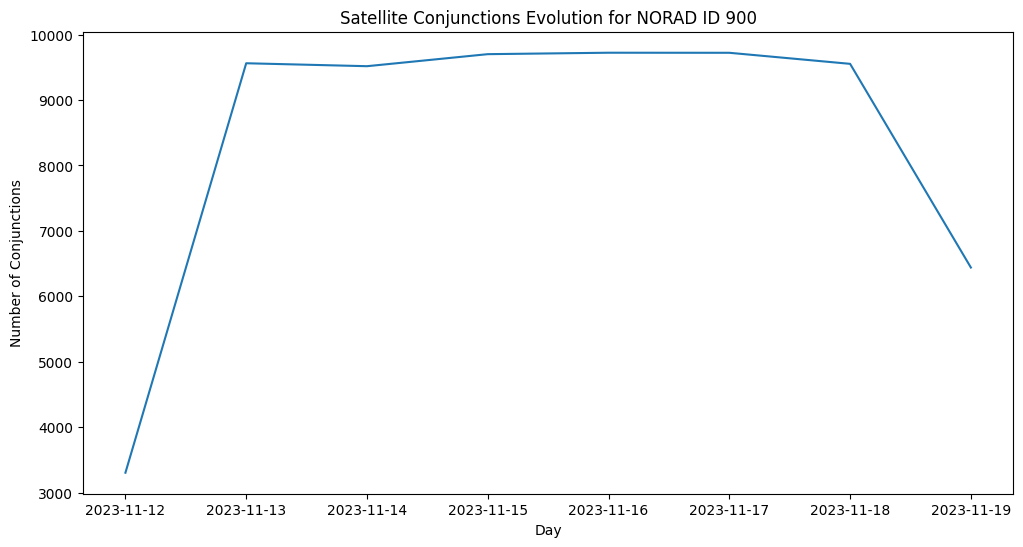

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Conjunctions', data=daily_conjunctions)
plt.title(f'Satellite Conjunctions Evolution for NORAD ID {satellite_id}')
plt.xlabel('Day')
plt.ylabel('Number of Conjunctions')
plt.show()

## ML Model Building using this dataset to predict the value of dilution

In [14]:
df=pd.read_csv('/kaggle/input/satellite/sort-minRange (1).csv')

In [15]:
df.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,54194,STARLINK-5271 [+],4.440,57327,OBJECT BB [-],4.017,2023-11-16 10:19:56.153,0.015,14.689,0.074910,0.008
1,53980,STARLINK-5133 [+],6.673,39690,COSMOS 921 DEB [-],6.440,2023-11-18 06:43:24.056,0.024,8.707,0.054480,0.007
2,52380,STARLINK-3793 [+],1.755,43801,OBJECT AV [-],1.225,2023-11-13 16:11:23.309,0.026,5.733,0.051040,0.007
3,56154,OBJECT B [+],0.484,56155,OBJECT C [+],0.484,2023-11-12 23:53:39.065,0.029,0.001,0.005313,0.007
4,41850,CELTEE 1 [+],2.070,55991,STARLINK-5948 [+],1.485,2023-11-13 22:37:57.150,0.032,13.486,0.021000,0.014


In [16]:
df['OBJECT_NAME_1'] = df['OBJECT_NAME_1'][1][-2]

In [17]:
df['OBJECT_NAME_1'] =df['OBJECT_NAME_1'].replace('+','active') 
df['OBJECT_NAME_1'] =df['OBJECT_NAME_1'].replace('P','active')
df['OBJECT_NAME_1'] =df['OBJECT_NAME_1'].replace('B','active')
df['OBJECT_NAME_1'] =df['OBJECT_NAME_1'].replace('S','active')
df['OBJECT_NAME_1'] =df['OBJECT_NAME_1'].replace('X','active')
df['OBJECT_NAME_1'] =df['OBJECT_NAME_1'].replace('-','inactive')
df['OBJECT_NAME_1'] =df['OBJECT_NAME_1'].replace('D','inactive')
df['OBJECT_NAME_1'] =df['OBJECT_NAME_1'].replace('?','inactive')

In [18]:
#unique value
df['OBJECT_NAME_1'].unique()

array(['active'], dtype=object)

In [19]:
#unique value
df['OBJECT_NAME_2'].unique()

array(['OBJECT BB [-]', 'COSMOS 921 DEB [-]', 'OBJECT AV [-]', ...,
       'STARLINK-2423 [+]', 'STARLINK-3702 [+]', 'STARLINK-5415 [+]'],
      dtype=object)

In [20]:
df['OBJECT_NAME_2'] = df['OBJECT_NAME_2'][1][-2]

In [21]:
df['OBJECT_NAME_2'] =df['OBJECT_NAME_2'].replace('-','inactive')

In [22]:
df.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,54194,active,4.440,57327,inactive,4.017,2023-11-16 10:19:56.153,0.015,14.689,0.074910,0.008
1,53980,active,6.673,39690,inactive,6.440,2023-11-18 06:43:24.056,0.024,8.707,0.054480,0.007
2,52380,active,1.755,43801,inactive,1.225,2023-11-13 16:11:23.309,0.026,5.733,0.051040,0.007
3,56154,active,0.484,56155,inactive,0.484,2023-11-12 23:53:39.065,0.029,0.001,0.005313,0.007
4,41850,active,2.070,55991,inactive,1.485,2023-11-13 22:37:57.150,0.032,13.486,0.021000,0.014


In [23]:
#categorical value to numerical value
df['OBJECT_NAME_1'] = df['OBJECT_NAME_1'].map({'active':0,'inactive':1})
df['OBJECT_NAME_2'] = df['OBJECT_NAME_2'].map({'active':0,'inactive':1})

In [24]:
import datetime
from datetime import datetime

In [25]:
df['TCA']

0        2023-11-16 10:19:56.153
1        2023-11-18 06:43:24.056
2        2023-11-13 16:11:23.309
3        2023-11-12 23:53:39.065
4        2023-11-13 22:37:57.150
                  ...           
67522    2023-11-18 13:25:17.082
67523    2023-11-19 14:52:39.719
67524    2023-11-14 17:05:16.918
67525    2023-11-14 22:13:42.123
67526    2023-11-16 19:13:58.676
Name: TCA, Length: 67527, dtype: object

In [26]:
#to change timestamp format
df['TCA'] = pd.to_datetime(df['TCA'])
df['TCA_N'] = df['TCA'].apply(lambda x: datetime.timestamp(x))

In [27]:
df=df.drop('TCA',axis=1)

In [28]:
df.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION,TCA_N
0,54194,0,4.440,57327,1,4.017,0.015,14.689,0.074910,0.008,1.700130e+09
1,53980,0,6.673,39690,1,6.440,0.024,8.707,0.054480,0.007,1.700290e+09
2,52380,0,1.755,43801,1,1.225,0.026,5.733,0.051040,0.007,1.699892e+09
3,56154,0,0.484,56155,1,0.484,0.029,0.001,0.005313,0.007,1.699833e+09
4,41850,0,2.070,55991,1,1.485,0.032,13.486,0.021000,0.014,1.699915e+09


<Axes: >

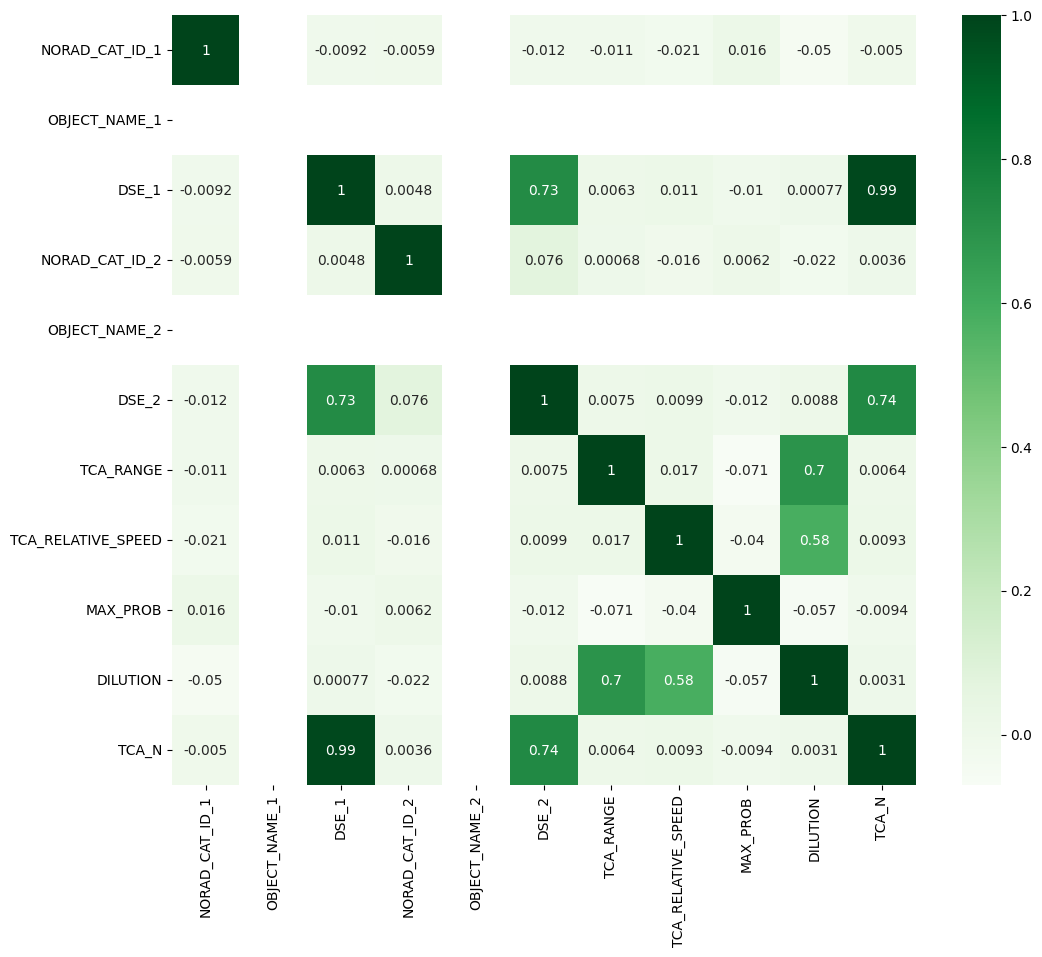

In [29]:
#heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [30]:
X=df.drop('DILUTION',axis=1)
y=df[['DILUTION']]

In [31]:
#splitting data
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
print(f'X_train',X_train.shape)
print(f'y_train',y_train.shape)
print(f'X_val',X_val.shape)
print(f'y_val',y_val.shape)

X_train (54021, 10)
y_train (54021, 1)
X_val (13506, 10)
y_val (13506, 1)


## Model Building

In [33]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators=1000,learning_rate=0.01,random_state=42)

#fit the model
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Prediction and mae

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
pred=xgb.predict(X_val)

mae = mean_squared_error(pred,y_val)
print('Mean Absolute Error : ',round(mae,5))

Mean Absolute Error :  0.00261
